In [ ]:
#calculate the price of health insurance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
dataset = pd.read_csv('insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1338 entries, 0 to 1337

Data columns (total 7 columns):

 #   Column    Non-Null Count  Dtype  

---  ------    --------------  -----  

 0   age       1338 non-null   int64  

 1   sex       1338 non-null   object 

 2   bmi       1338 non-null   float64

 3   children  1338 non-null   int64  

 4   smoker    1338 non-null   object 

 5   region    1338 non-null   object 

 6   charges   1338 non-null   float64

dtypes: float64(2), int64(2), object(3)

memory usage: 73.3+ KB


In [5]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
#change smoker to 1 and 0
Smoker = pd.get_dummies(dataset['smoker'], drop_first=True)
dataset.drop('smoker', axis=1, inplace=True)
dataset = pd.concat([dataset,Smoker],axis=1)
dataset.head()

,age,sex,bmi,children,region,charges,yes
0,19,female,27.900,0,southwest,16884.92400,1
1,18,male,33.770,1,southeast,1725.55230,0
2,28,male,33.000,3,southeast,4449.46200,0
3,33,male,22.705,0,northwest,21984.47061,0
4,32,male,28.880,0,northwest,3866.85520,0


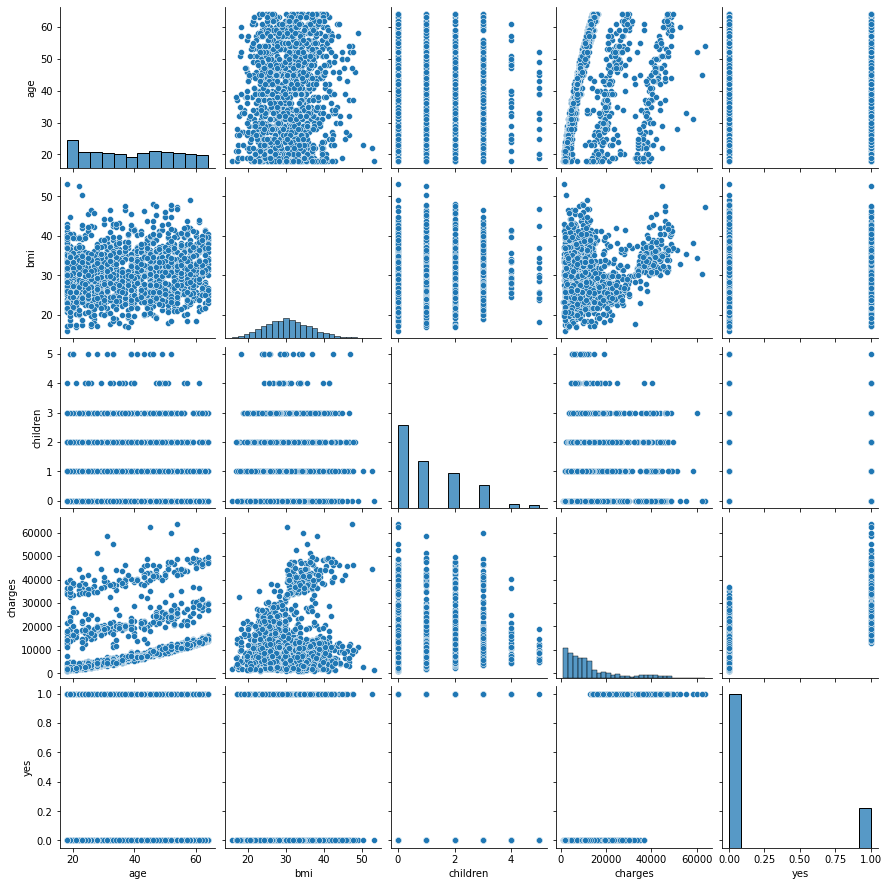

In [7]:
sns.pairplot(dataset)

c:\users\emana\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

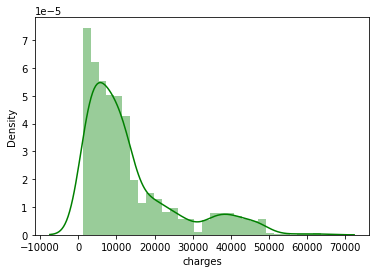

In [8]:
sns.distplot(dataset['charges'], color="green")

<AxesSubplot:>

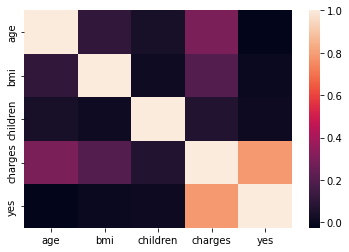

In [9]:
sns.heatmap(dataset.corr())
#smokers are most likely to get charged more

In [11]:
X = dataset[['age','bmi','children','yes']]

In [12]:
y = dataset[['charges']]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [17]:
lm = LinearRegression()

In [18]:
lm.fit(X_train, y_train)

LinearRegression()

In [19]:
print(lm.intercept_)

[-12506.17695676]


In [20]:
lm.coef_

array([[  241.81575872,   355.20884332,   495.13412125, 23453.63082433]])

In [21]:
predictions = lm.predict(X_test)

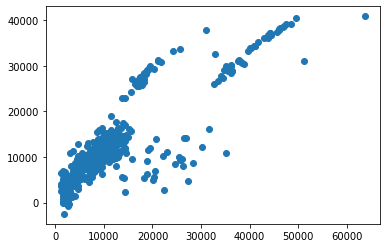

In [22]:
plt.scatter(y_test, predictions)

In [24]:
from sklearn import metrics
metrics.mean_absolute_error(y_test, predictions)

4010.304497356853